In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [76]:
df=pd.read_csv("C:\\ToyotaCorolla - MLR.csv")

In [77]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [79]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [81]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


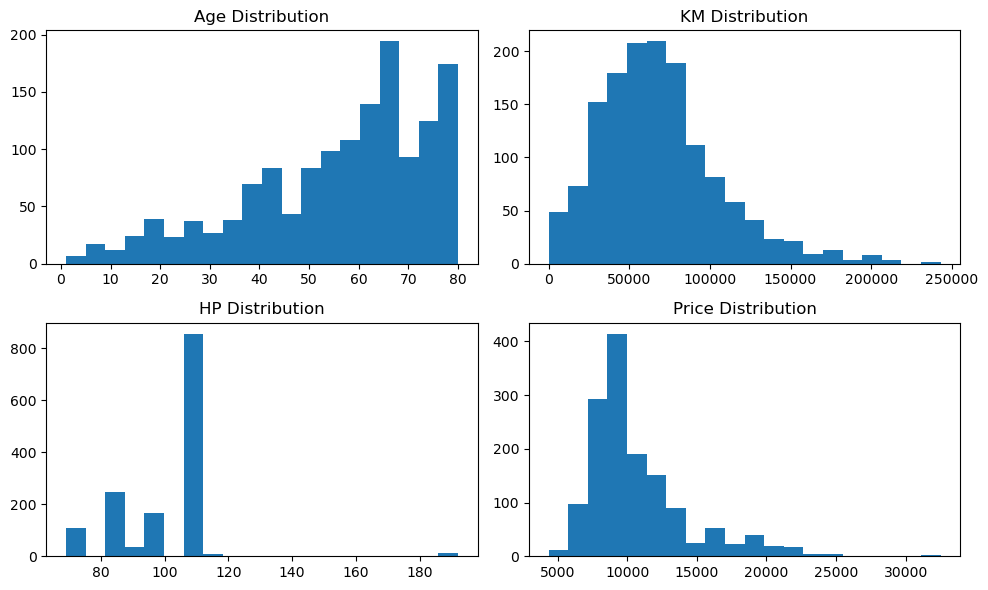

In [82]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(df['Age_08_04'], bins=20)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
plt.hist(df['KM'], bins=20)
plt.title('KM Distribution')

plt.subplot(2, 2, 3)
plt.hist(df['HP'], bins=20)
plt.title('HP Distribution')

plt.subplot(2, 2, 4)
plt.hist(df['Price'], bins=20)
plt.title('Price Distribution')

plt.tight_layout()
plt.show()

In [83]:
data=df.copy()

In [84]:
labelencoder = LabelEncoder()

data.iloc[:,3] = labelencoder.fit_transform(data.iloc[:,3])

In [85]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [86]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [87]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [88]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [89]:
label_encoder=preprocessing.LabelEncoder()
df['Fuel_Type']= label_encoder.fit_transform(df['Fuel_Type'])

In [90]:
x=data.iloc[:,[0,1,2,4,5,6,7,8,9,10]]
y=data['Fuel_Type']

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [92]:
print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)



Training set size: (1148, 10)
Testing set size: (288, 10)


In [93]:
data.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


C:\Users\priyadarsani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\priyadarsani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\priyadarsani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\priyadarsani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

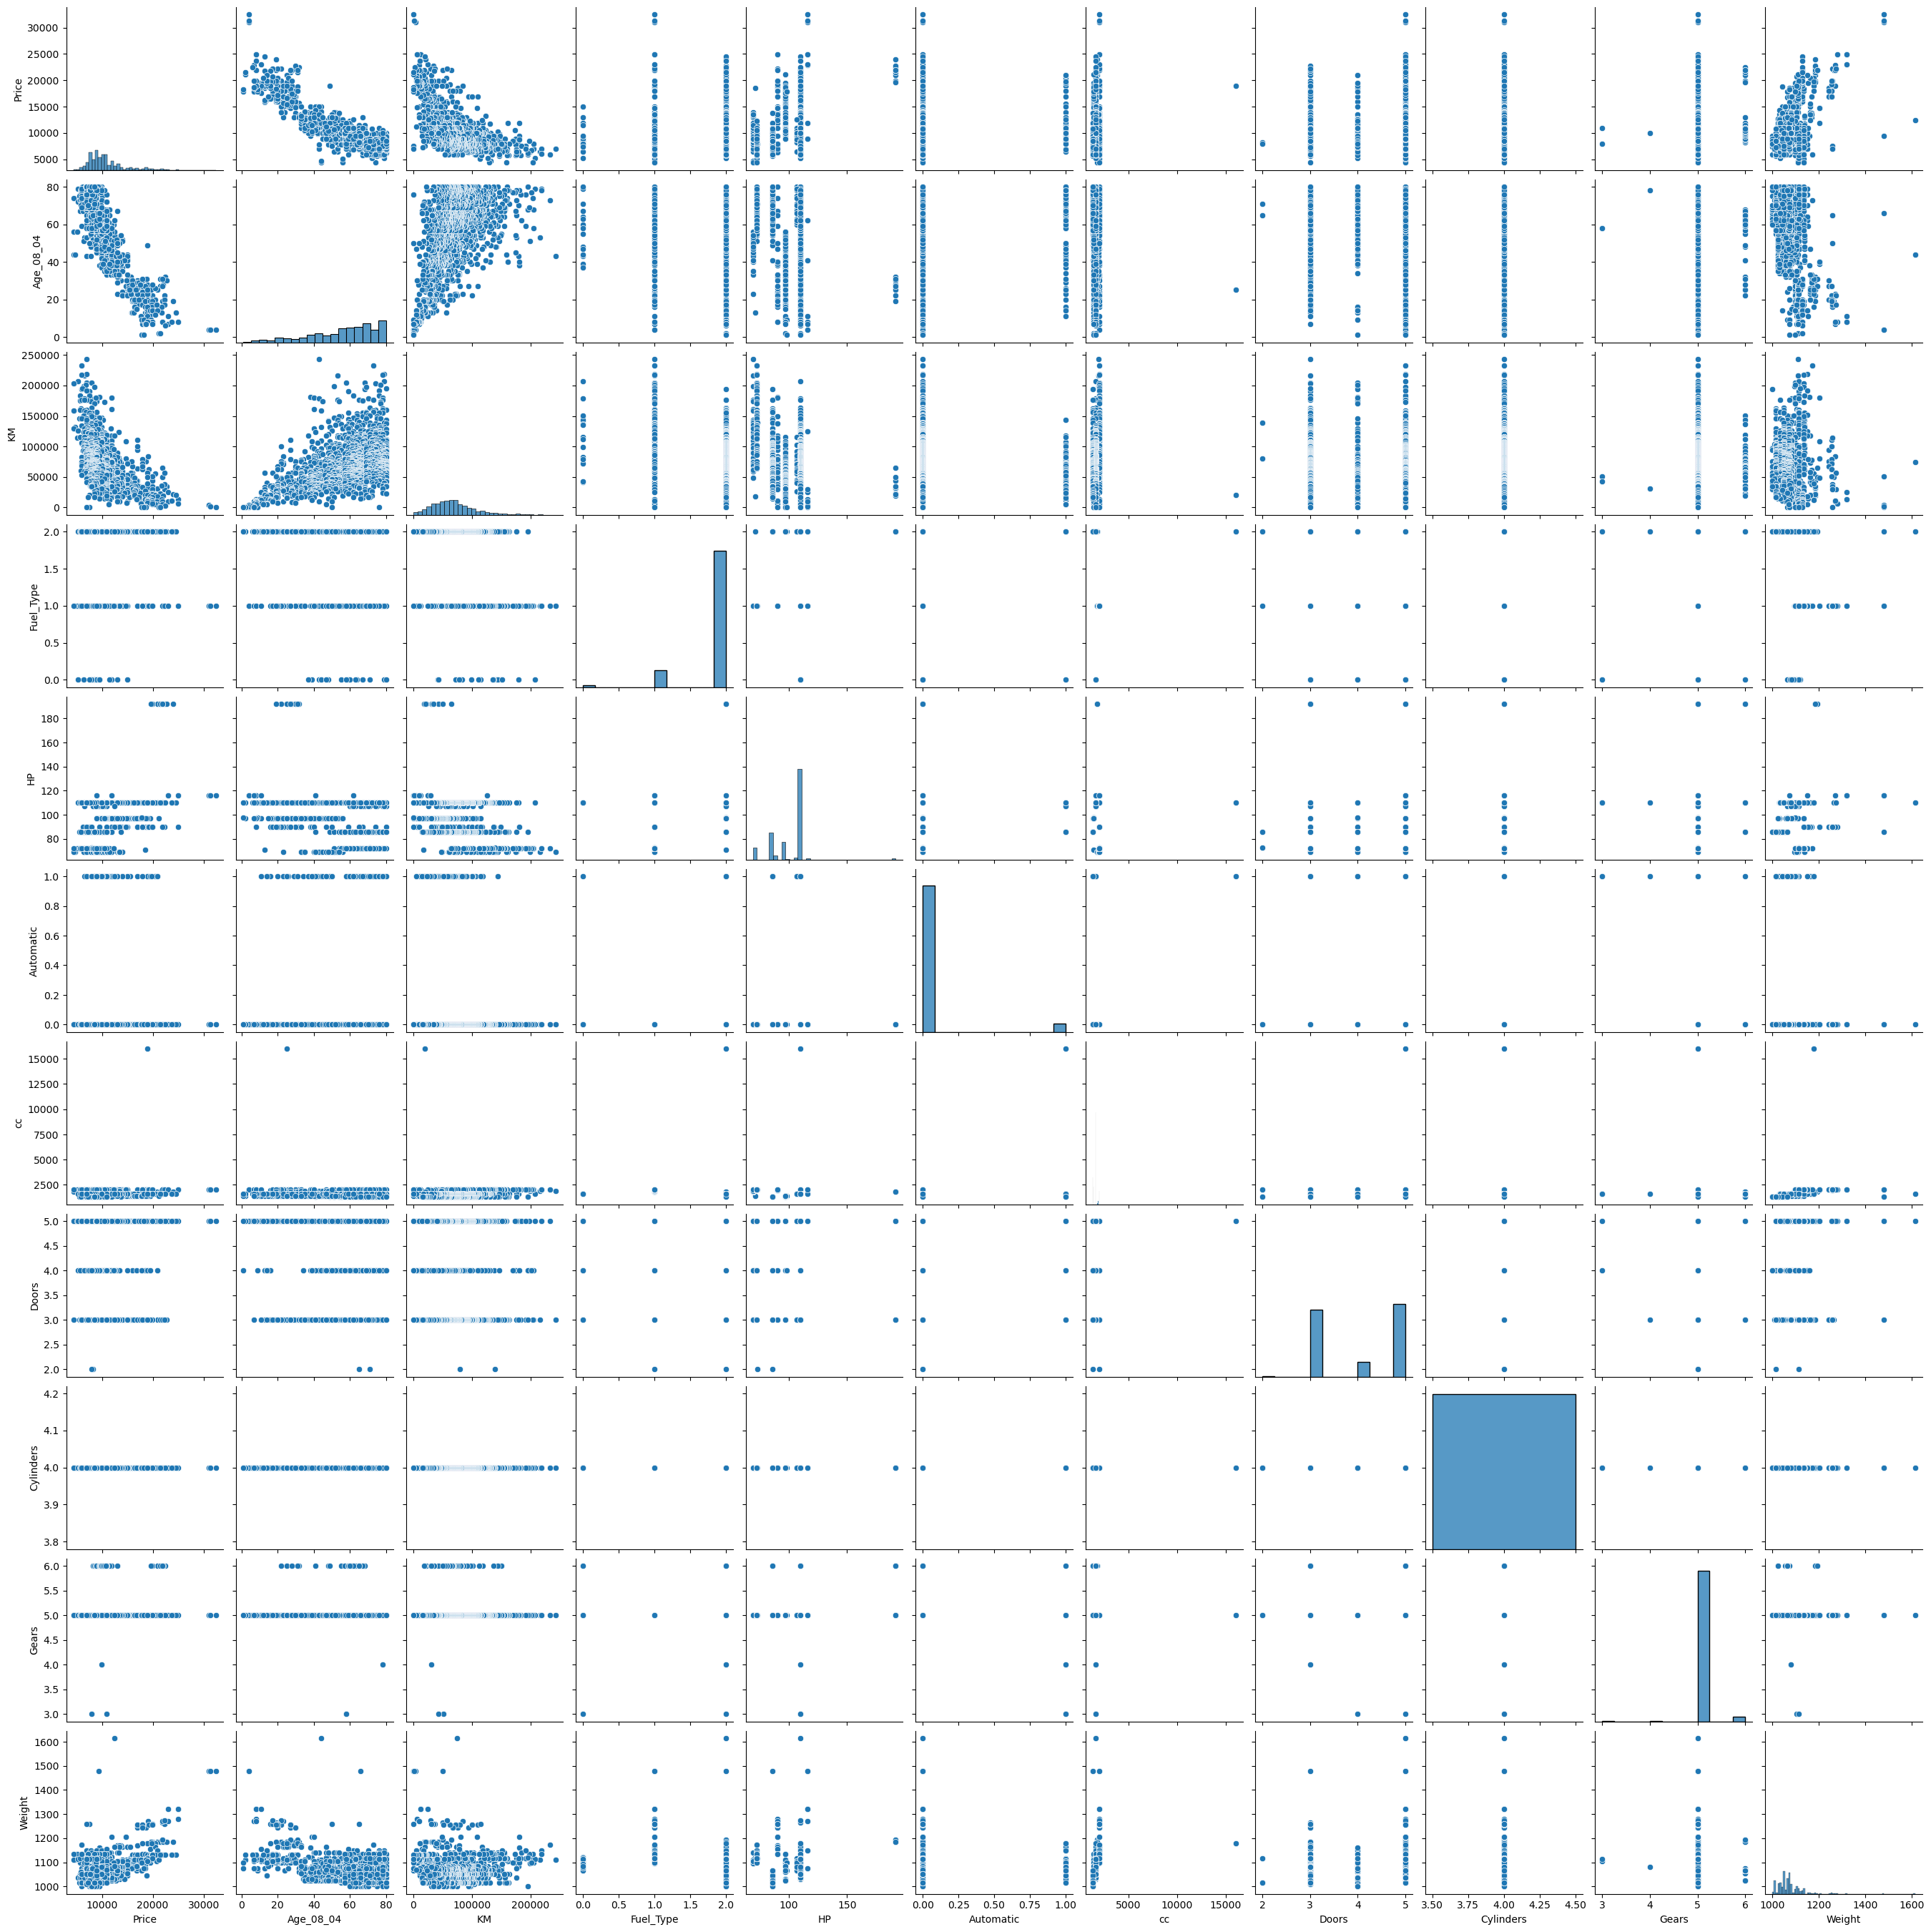

In [94]:
sns.pairplot(data)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [97]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [98]:
x_train_model2 = x_train.drop(['cc','Doors'], axis=1)
model2 = LinearRegression()
model2.fit(x_train_model2, y_train)

LinearRegression()

In [99]:
x_train_model3 = x_train.drop(['Doors', 'KM'],axis=1)
model3 = LinearRegression()
model3.fit(x_train_model3, y_train)


LinearRegression()

In [100]:
print(pd.DataFrame({'Variable': x_train.columns, 'Coefficient': model1.coef_}))

    Variable  Coefficient
0      Price     0.000018
1  Age_08_04     0.003399
2         KM    -0.000003
3         HP     0.008008
4  Automatic     0.123292
5         cc    -0.000062
6      Doors     0.047027
7  Cylinders     0.000000
8      Gears     0.134133
9     Weight    -0.003968


In [101]:
print("Model 2 Coefficients:")
print(pd.DataFrame({'Variable': x_train_model2.columns, 'Coefficient': model2.coef_}))


Model 2 Coefficients:
    Variable  Coefficient
0      Price     0.000018
1  Age_08_04     0.003479
2         KM    -0.000003
3         HP     0.008230
4  Automatic     0.103824
5  Cylinders     0.000000
6      Gears     0.086838
7     Weight    -0.003891


In [102]:
print("Model 3 Coefficients:")
print(pd.DataFrame({'Variable': x_train_model3.columns, 'Coefficient': model3.coef_}))

Model 3 Coefficients:
    Variable  Coefficient
0      Price     0.000038
1  Age_08_04     0.003181
2         HP     0.009348
3  Automatic     0.147711
4         cc    -0.000078
5  Cylinders     0.000000
6      Gears     0.044884
7     Weight    -0.004488


In [103]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test.drop(['cc','Doors'], axis=1))
y_pred3 = model3.predict ( x_train.drop(['Doors', 'KM'],axis=1))

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred1 = model1.predict(x_test)
print("Model 1 Evaluation Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred1))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred1))
print("R-Squared:", r2_score(y_test, y_pred1))

Model 1 Evaluation Metrics:
Mean Squared Error: 0.08643062341867762
Mean Absolute Error: 0.14076342176036516
R-Squared: 0.5273355555588584


In [105]:
y_pred2 = model2.predict(x_test.drop(['cc', 'Doors'], axis=1))
print("Model 2 Evaluation Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred2))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred2))
print("R-Squared:", r2_score(y_test, y_pred2))


Model 2 Evaluation Metrics:
Mean Squared Error: 0.08858751488884567
Mean Absolute Error: 0.15361293103201656
R-Squared: 0.515540130880173


In [106]:
y_pred3 = model3.predict(x_test.drop(['Doors', 'KM'], axis=1))
print("Model 3 Evaluation Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred3))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred3))
print("R-Squared:", r2_score(y_test, y_pred3))

Model 3 Evaluation Metrics:
Mean Squared Error: 0.09578089512834921
Mean Absolute Error: 0.147807510917685
R-Squared: 0.4762015846557792


In [107]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)
print("Lasso Evaluation Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("R-Squared:", r2_score(y_test, y_pred_lasso))

Lasso Evaluation Metrics:
Mean Squared Error: 0.08627172502822301
Mean Absolute Error: 0.14701139164248814
R-Squared: 0.5282045255659702


In [108]:
print("Regression report for training")
print("Mean Squared Error:", mean_squared_error(y_train, model1.predict(x_train)))
print("Mean Absolute Error:", mean_absolute_error(y_train, model1.predict(x_train)))
print("R-Squared:", r2_score(y_train, model1.predict(x_train)))


Regression report for training
Mean Squared Error: 0.05042705332618281
Mean Absolute Error: 0.1160969749807202
R-Squared: 0.6005552766817953


In [1]:
'''
1.What is Normalization & Standardization and how is it helpful?

A .Normalization: Scaling data to a range between 0 and 1.
Standardization: Scaling data to have a mean of 0 and a standard deviation of 1.

Both are helpful because they:

- Prevent features with large ranges from dominating the model
- Improve model convergence and performance
- Enable comparison of coefficients
'''

'\n1.What is Normalization & Standardization and how is it helpful?\n\nA .Normalization: Scaling data to a range between 0 and 1.\nStandardization: Scaling data to have a mean of 0 and a standard deviation of 1.\n\nBoth are helpful because they:\n\n- Prevent features with large ranges from dominating the model\n- Improve model convergence and performance\n- Enable comparison of coefficients\n'

In [3]:
'''2.What techniques can be used to address multicollinearity in multiple linear regression?
A.
- Remove highly correlated features (e.g., > 0.7 correlation)
- Use dimensionality reduction techniques (e.g., PCA, feature selection)
- Regularization methods (e.g., Ridge, Lasso)
- Use variance inflation factor (VIF) to detect multicollinearity

These techniques help to:

- Reduce the impact of correlated features
- Improve model interpretability
- Prevent overfitting'''

'2.What techniques can be used to address multicollinearity in multiple linear regression?\nA.\n- Remove highly correlated features (e.g., > 0.7 correlation)\n- Use dimensionality reduction techniques (e.g., PCA, feature selection)\n- Regularization methods (e.g., Ridge, Lasso)\n- Use variance inflation factor (VIF) to detect multicollinearity\n\nThese techniques help to:\n\n- Reduce the impact of correlated features\n- Improve model interpretability\n- Prevent overfitting'